Globalne minima:
Minimum at [ 0.08984199 -0.71265634], Function value: -1.0316284534898488
Minimum at [-0.08984202  0.7126564 ], Function value: -1.0316284534898772
Minimum at [-0.08984202  0.7126564 ], Function value: -1.031628453489877
Minimum at [-0.08984204  0.71265641], Function value: -1.0316284534898745
Minimum at [-0.08984213  0.71265626], Function value: -1.0316284534896405
Minimum at [-0.08984216  0.71265646], Function value: -1.0316284534897764
Minimum at [-0.089842    0.71265583], Function value: -1.031628453487187
Minimum at [-0.0898423   0.71265585], Function value: -1.0316284534869302
Minimum at [-0.08984137  0.7126561 ], Function value: -1.0316284534877274
Minimum at [-0.08984211  0.71265652], Function value: -1.0316284534897444
Minimum at [-0.08984255  0.71265664], Function value: -1.03162845348842
Minimum at [-0.0898425   0.71265658], Function value: -1.0316284534887925
Minimum at [-0.0898421   0.71265634], Function value: -1.0316284534898104
Minimum at [-0.08984212  

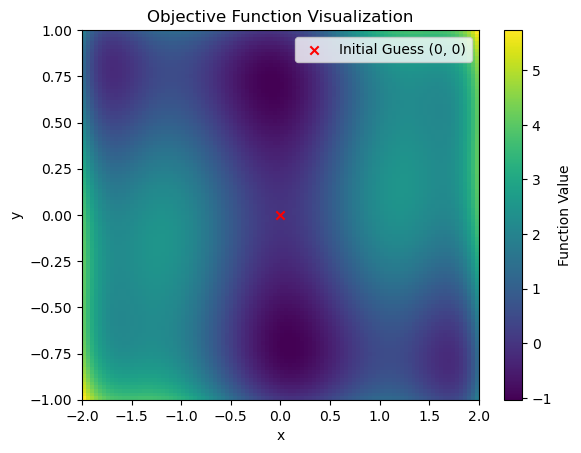

In [12]:
#1
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def objective_function(xy):
    x, y = xy
    return (4 - 2.1*x**2 + (x**4)/3) * x**2 + x*y + (4*y**2 - 4) * y**2

x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-1, 1, 100)
x_mesh, y_mesh = np.meshgrid(x_values, y_values)
z_mesh = objective_function([x_mesh, y_mesh])

plt.imshow(z_mesh, extent=[-2, 2, -1, 1], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Function Value')
plt.title('Objective Function Visualization')
plt.xlabel('x')
plt.ylabel('y')

plt.xlim(-2, 2)
plt.ylim(-1, 1)

global_minima = []

for x_start in np.linspace(-2, 2, 100):
    for y_start in np.linspace(-1, 1, 100):
        result = minimize(objective_function, x0=(x_start, y_start), method='L-BFGS-B', bounds=((-2, 2), (-1, 1)))
        global_minima.append((result.fun, result.x))

print("Global minima:")
for minimum_value, minimum_point in global_minima:
    print(f"Minimum at {minimum_point}, Function value: {minimum_value}")

plt.scatter(0, 0, color='red', marker='x', label='Initial Guess (0, 0)')
plt.legend()

plt.show()


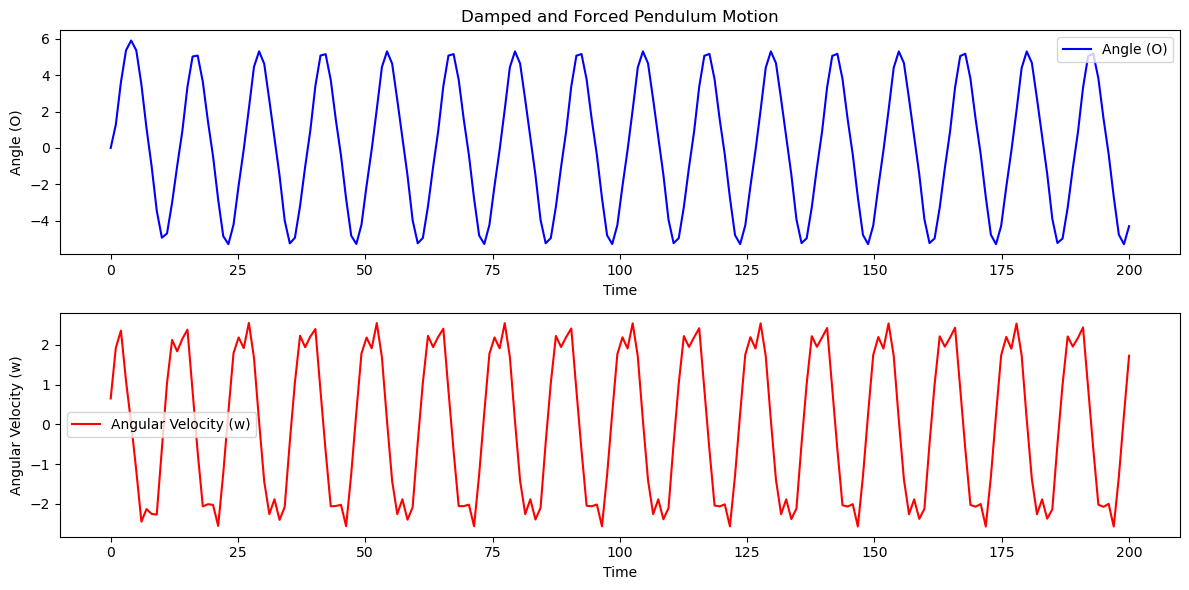

In [15]:
#2
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def damped_forced_pendulum_equations(y, t, Q, g, l, p, omega):
    O, w = y
    dydt = [w, (-1/Q)*w + (g/l)*np.sin(O) + p*np.cos(omega*t)]
    return dydt


Q = 2.0  # damping factor
g = 9.81  # gravitational acceleration
l = 10.0  # length of the pendulum
p = 1.5   # forcing amplitude
omega = 0.5  # driving frequency

initial_conditions = [0.0, 0.65]  # initial angle and initial angular velocity

t = np.linspace(0, 200, 200)  # 200 time steps over a period of 200 time units

solution = odeint(damped_forced_pendulum_equations, initial_conditions, t, args=(Q, g, l, p, omega))

O_solution, w_solution = solution.T

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, O_solution, 'b', label='Angle (O)')
plt.title('Damped and Forced Pendulum Motion')
plt.ylabel('Angle (O)')
plt.xlabel('Time')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, w_solution, 'r', label='Angular Velocity (w)')
plt.ylabel('Angular Velocity (w)')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()



In [17]:
#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'data/populations.txt'
data = pd.read_csv(file_path, sep='\t')

hares_population = data['hare'].values
lynx_population = data['lynx'].values

fft_hares = np.fft.fft(hares_population)
fft_lynx = np.fft.fft(lynx_population)

freq = np.fft.fftfreq(len(data), data['year'][1] - data['year'][0])

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(fft_hares), label='Hares Population FFT')
plt.title('FFT of Lynxs-Hares Population Over Years')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_lynx), label='Lynx Population FFT')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


KeyError: 'year'

In [ ]:
#4
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift
from matplotlib.colors import LogNorm

image = plt.imread("images/moonlanding.png")

plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

image_fft = fft2(image)

image_fft_shifted = fftshift(image_fft)

plt.figure(figsize=(8, 8))
plt.imshow(np.abs(image_fft_shifted), norm=LogNorm(vmin=5))
plt.title('Spectrum of the Image')
plt.colorbar(label='Log Scale')
plt.show()

rows, cols = image.shape
noise_radius = 20
center_row, center_col = rows // 2, cols // 2
image_fft_shifted[center_row - noise_radius:center_row + noise_radius,
                  center_col - noise_radius:center_col + noise_radius] = 0

image_filtered = ifft2(fftshift(image_fft_shifted)).real

plt.figure(figsize=(8, 8))
plt.imshow(image_filtered, cmap='gray')
plt.title('Filtered Image')
plt.show()
